# PredictEmAll - Kaggle Dataset
---

### Dataset

Dataset consists of roughly 293,000 pokemon sightings (historical appearances of Pokemon), having coordinates, time, weather, population density, distance to pokestops/ gyms etc. as features. The target is to train a machine learning algorithm so that it can predict where pokemon appear in future. So, can you predict'em all?)

### Feature Description

Feature description

* pokemonId - the identifier of a pokemon, should be deleted to not affect predictions.
* latitude, longitude - coordinates of a sighting (numeric)
* appearedLocalTime (String) - time of a sighting in format yyyy-mm-dd'T'hh-mm-ss.ms'Z' (String)
* cellId 90-5850m - geographic position projected on a S2 Cell, with cell sizes ranging from 90 to 5850m (numeric)
* appearedTimeOfDay - time of the day of a sighting (night, evening, afternoon, morning)
* appearedHour/appearedMinute - local hour/minute of a sighting (numeric)
* appearedDayOfWeek - week day of a sighting (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday)
* appearedDay/appearedMonth/appearedYear - day/month/year of a sighting (numeric)
* terrainType - terrain where pokemon appeared described with help of GLCF Modis Land Cover (numeric)
* closeToWater - did pokemon appear close to water (true, false)
* city - the city of a sighting (nominal)
* continent (not always parsed right) - the continent of a sighting (nominal)
* weather - weather type during a sighting (Foggy Clear, PartlyCloudy, MostlyCloudy, Overcast, Rain, * BreezyandOvercast, LightRain, Drizzle, BreezyandPartlyCloudy, HeavyRain, BreezyandMostlyCloudy, Breezy, Windy, * WindyandFoggy, Humid, Dry, WindyandPartlyCloudy, DryandMostlyCloudy, DryandPartlyCloudy, DrizzleandBreezy, * LightRainandBreezy, HumidandPartlyCloudy, HumidandOvercast, RainandWindy) // Source for all weather features
* temperature - temperature in celsius at the location of a sighting (numeric)
* windSpeed - speed of the wind in km/h at the location of a sighting (numeric)
* windBearing - wind direction (numeric)
* pressure - atmospheric pressure in bar at the location of a sighting (numeric)
* weatherIcon - a compact representation of the weather at the location of a sighting (fog, clear-night, partly-* cloudy-night, partly-cloudy-day, cloudy, clear-day, rain, wind)
* sunriseMinutesMidnight-sunsetMinutesBefore - time of appearance relatively to sunrise/sunset
* population density where pokemon appeared
* urban-rural - how urban is location where pokemon appeared (true, false)
* gymDistanceKm, pokestopDistanceKm - how far is the nearest gym/pokestop in km from a sighting? (numeric)
* gymIn100m-pokestopIn5000m - is there a gym/pokestop in 100/200/etc meters? (true, false)
* cooc 1-cooc 151 - cooccurence of pokemon - did some other pokemon appear on relatively same position lately? (true, false)
* class - last variable, says which pokemon it is, should be predicted.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
print "Reading CSV"
data_frame = pd.read_csv('../300k.csv', low_memory=False)
print "CSV Read Complete"

Reading CSV
CSV Read Complete


I chose to use Pandas for extracting the CSV data because:
* Who doesn't like pandas :)
* It was faster than Numpy's ```genfromtxt``` and Python's own ```csv``` module.
* DataFrames are a great way of visualising data in a tabular format.

After extracting the data, let's plot a frequency graph or a histogram of how frequently each Pokemon is seen.

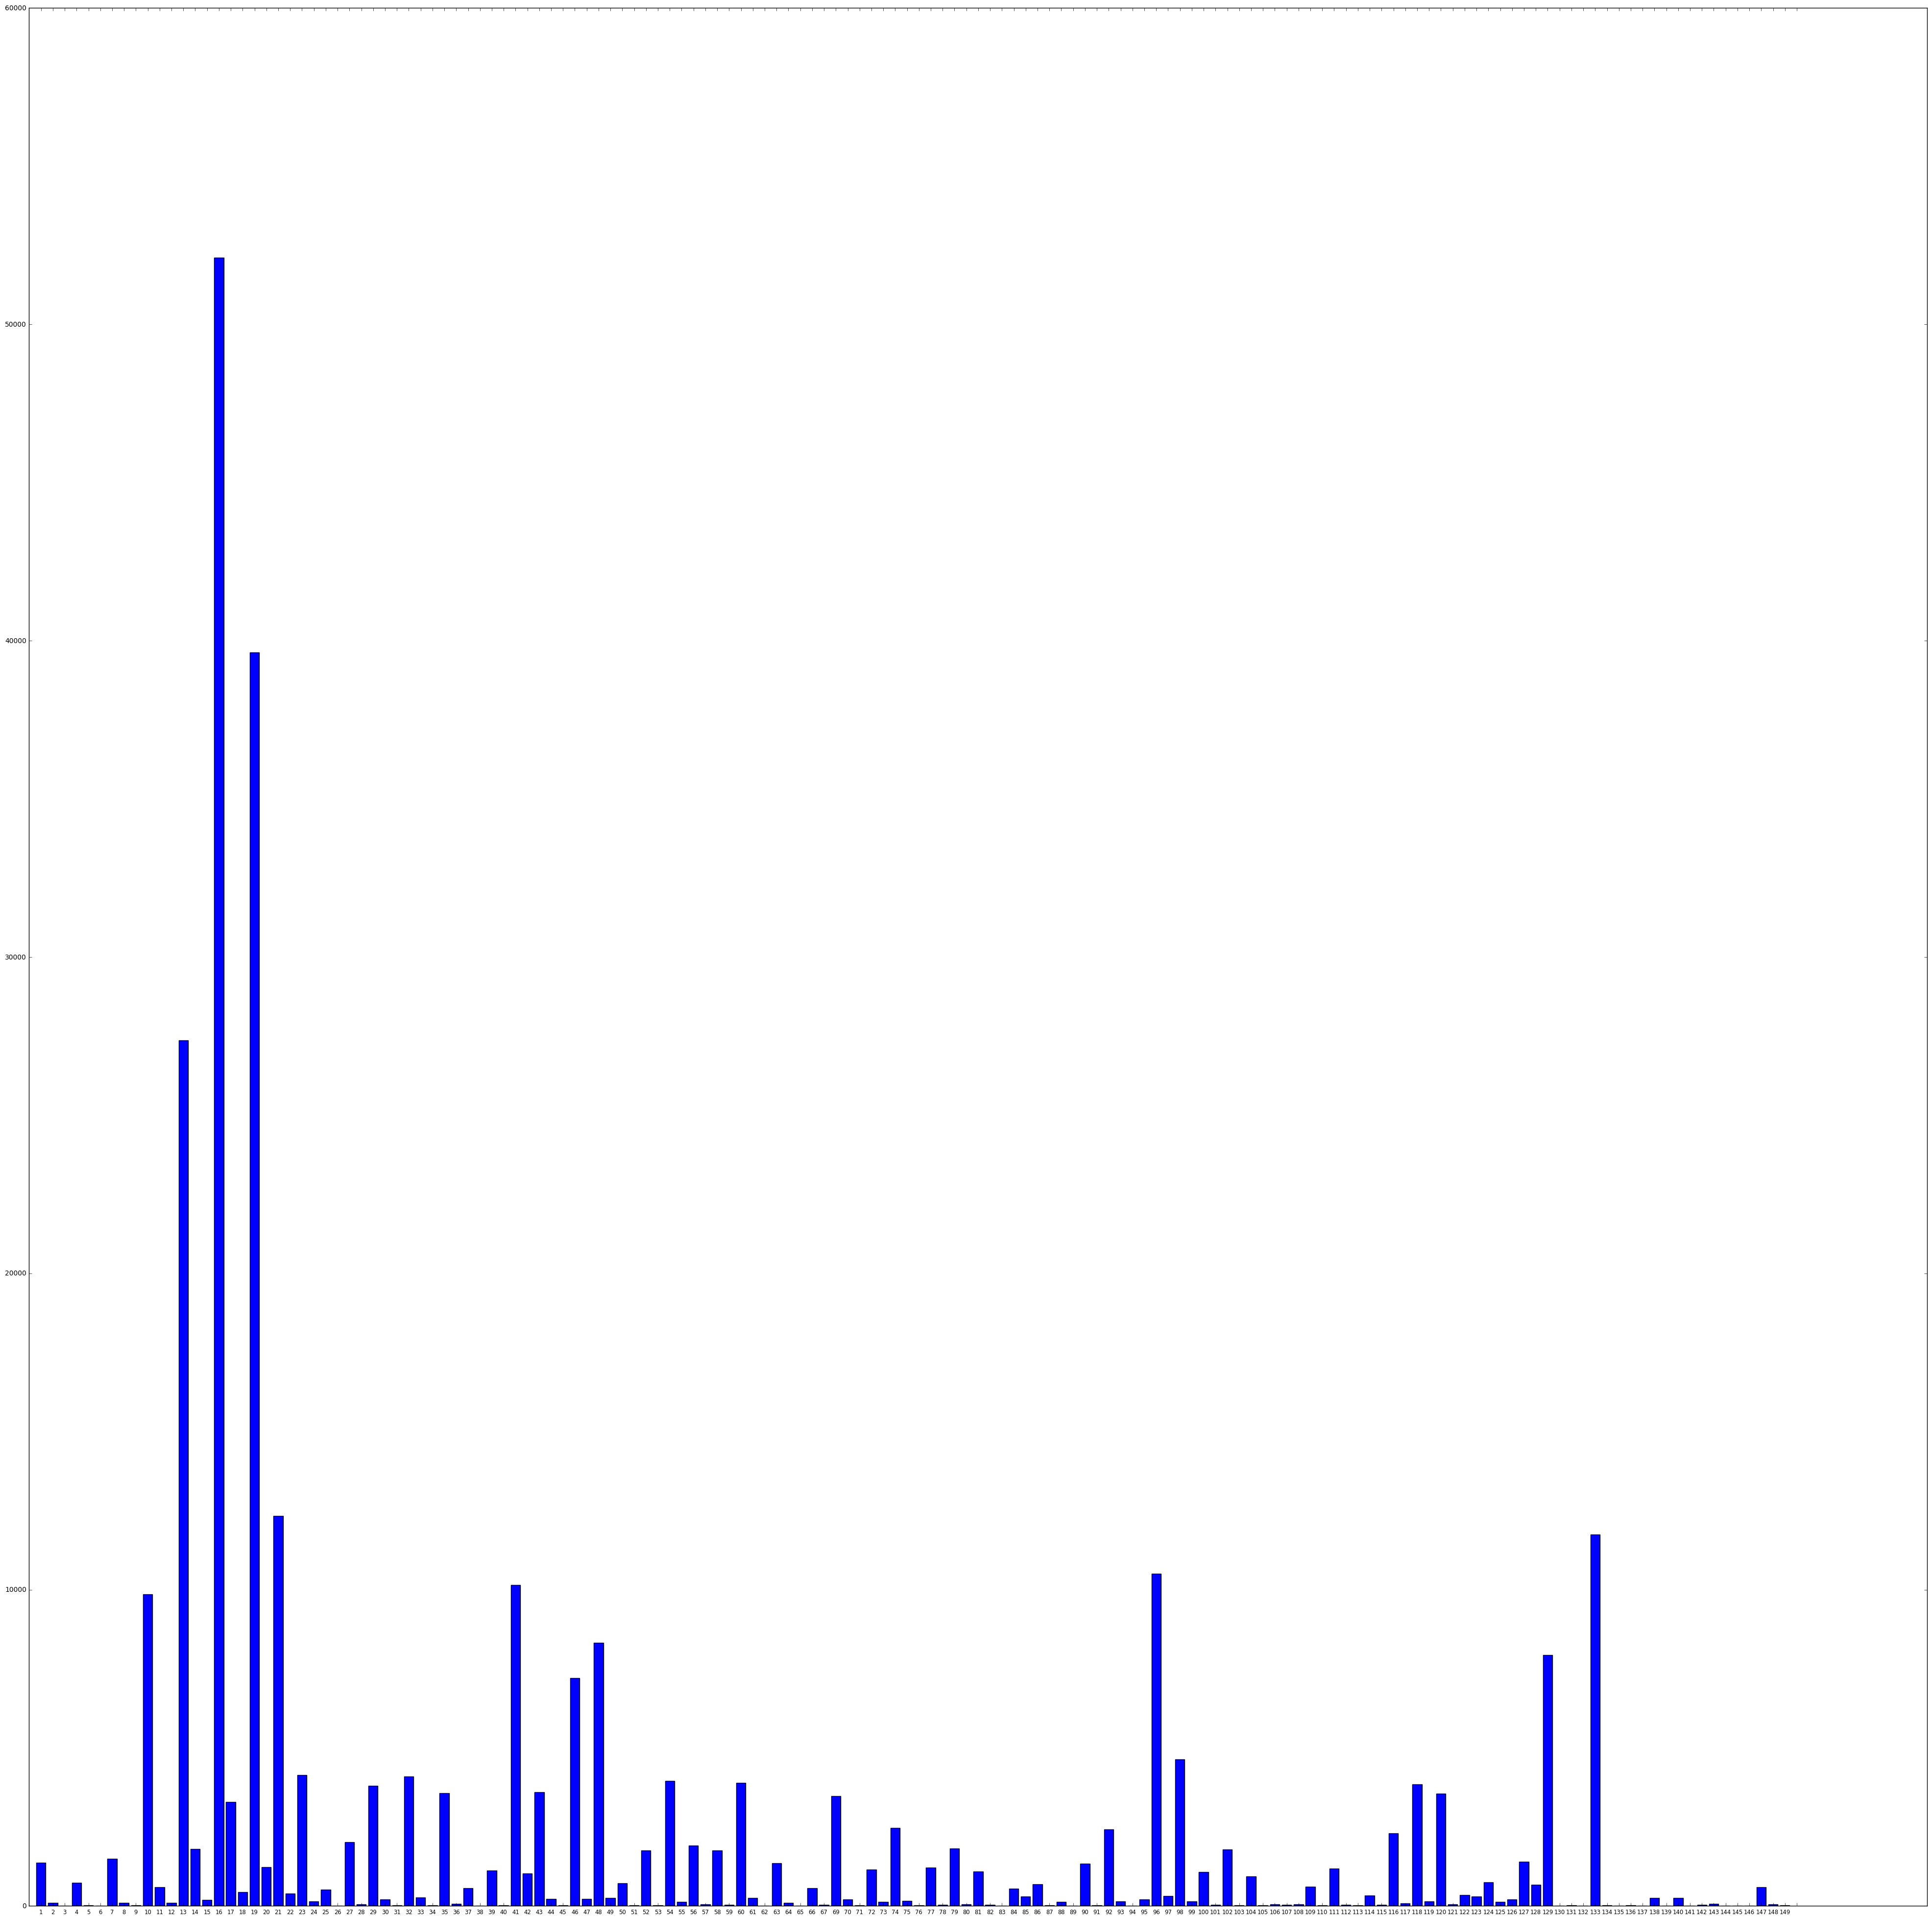

In [2]:
from collections import Counter
pokemon_ids = data_frame['pokemonId'].values
count = Counter(pokemon_ids)
# print sorted(count.items())
count.update({132: 0, 144: 0, 145: 0, 146: 0})
plt.figure(figsize=(50, 50))
plt.bar(np.arange(pokemon_ids.min(), pokemon_ids.max()), count.values(), align='center')
# plt.hist(pokemon_ids, bins=np.arange(pokemon_ids.min(), pokemon_ids.max() + 1), align='left', type='step')
plt.xticks(np.arange(pokemon_ids.min(), pokemon_ids.max() + 1), count.keys(), size='small')
plt.show()

The graph has been increased a lot in size to show all the bars distinctly. **Pidgey (#15)** is the most frequently spawning Pokemon.

Let's begin by going according to the instructions and dropping the first column i.e. PokemonId.

In [3]:
features = data_frame.drop('pokemonId', axis=1)

In this first approach, I'm going to consider only the most basic features that can be mentioned when someone asks *Why this particular Pokemon spawned here?*:
* Appeared Local Time
* CellID @ Cell Size 2920m
* terrainType
* closeToWater
* Wind Speed
* Pressure


In [19]:
# print list(data_frame.columns.values)
features = data_frame[['appearedLocalTime', 'cellId_2920m', 'terrainType', 'closeToWater', 'temperature', 'windSpeed', 'windBearing', 'population_density', 'gymDistanceKm', 'pokestopDistanceKm']]
# features = dat_frame[['appearedLocalTime', '']]